## Global

In [1308]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1309]:
#Import dos arquivos csv
pilotos = pd.read_csv('./bases/drivers.csv')
piloto_classificacoes = pd.read_csv('./bases/driver_standings.csv')
sprint_resultados = pd.read_csv('./bases/sprint_results.csv')
parada_boxes = pd.read_csv('./bases/pit_stops.csv')
qualificacao = pd.read_csv('./bases/qualifying.csv')
status = pd.read_csv('./bases/status.csv') #Possivel exclusão
temporadas = pd.read_csv('./bases/seasons.csv') #Possivel exclusão
construtores = pd.read_csv('./bases/constructors.csv')
construtores_resultados = pd.read_csv('./bases/constructor_results.csv')

## Tratamento/Limpeza de dados

Tabelas a serem tratadas, limpas e análisadas serão:
pilotos, pilotos_classificacoes, construtores, construtor_resultados, sprint_resultados, parada_boxes, status, temporadas,

### T/L tabela DRIVERS (PILOTOS):

Comentários:

É possível excluir as colunas "número" e "código", mas por hora só observar se ao decorrer do projeto essas colunas se tornam uteis, por isso é melhor optar em manter. Elas podem ser uteis visto que um carro pode ter mais de um piloto, e em questão do "código" ou sigla do piloto pode diferenciar se caso ocorrer de ter duas pessoas ter os mesmos nomes e sobrenomes.

#### Alterações pré-determinadas:

In [1310]:
pilotos

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [1311]:
#Colocando as colunas em PT_BR
pilotos.columns = ['piloto_id', 'piloto_ref', 'numero', 'codigo', 'nome', 'sobrenome', 'dt_nascimento', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
pilotos = pilotos.drop('url', axis=1)

In [1312]:
pilotos

,piloto_id,piloto_ref,numero,codigo,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian


#### Informações sobre as colunas

In [1313]:
print("Colunas: ")
pilotos.columns

Colunas: 


Index(['piloto_id', 'piloto_ref', 'numero', 'codigo', 'nome', 'sobrenome',
       'dt_nascimento', 'nacionalidade'],
      dtype='object')

In [1314]:
print("Descricao: ")
pilotos.describe()

Descricao: 


,piloto_id
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


In [1315]:
print("Informacoes: ")
pilotos.info()
print("\n")


print("Dimensoes: ")
print(pilotos.shape)
print("\n")

print("Head:")
pilotos.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   piloto_id      857 non-null    int64 
 1   piloto_ref     857 non-null    object
 2   numero         857 non-null    object
 3   codigo         857 non-null    object
 4   nome           857 non-null    object
 5   sobrenome      857 non-null    object
 6   dt_nascimento  857 non-null    object
 7   nacionalidade  857 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.7+ KB


Dimensoes: 
(857, 8)


Head:


,piloto_id,piloto_ref,numero,codigo,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [1316]:
#retorna o número de valores ausentes para cada coluna.
pilotos.isna().sum()

piloto_id        0
piloto_ref       0
numero           0
codigo           0
nome             0
sobrenome        0
dt_nascimento    0
nacionalidade    0
dtype: int64

#### Alterações de type nas colunas e nulls

In [1317]:
#Colocando os valores "\n" COMO None
pilotos = pilotos.replace('\\N', np.nan)
pilotos = pilotos.replace('<NA>', np.nan)

In [1318]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
piloto_id: 0
piloto_ref: 0
numero: 0
codigo: 0
nome: 0
sobrenome: 0
dt_nascimento: 0
nacionalidade: 0


In [1319]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
piloto_id: 0
piloto_ref: 2
numero: 803
codigo: 757
nome: 2
sobrenome: 1
dt_nascimento: 0
nacionalidade: 0


In [1320]:
#Transformando em String
pilotos['piloto_ref'] = pilotos['piloto_ref'].astype(pd.StringDtype())
pilotos['numero'] = pilotos['numero'].astype(pd.StringDtype())
pilotos['codigo'] = pilotos['codigo'].astype(pd.StringDtype())
pilotos['nome'] = pilotos['nome'].astype(pd.StringDtype())
pilotos['sobrenome'] = pilotos['sobrenome'].astype(pd.StringDtype())
pilotos['nacionalidade'] = pilotos['nacionalidade'].astype(pd.StringDtype())

#Transformando em date, pois está em object
pilotos['dt_nascimento'] = pd.to_datetime(pilotos['dt_nascimento'])

### T/L tabela DRIVERS_STANDINGS (PILOTOS_CLASSIFICADOS):

Comentários:

Todas as colunas fazem sentido, algumas colunas mesmo com muito outsiders fazem sentido porque essas estão diretamente ligada a desempenho, devido a isso faz sentido ter muitos outsiders, já que só alguns conseguiram e conseguirão ter bons desempenhos.

#### Alterações pré-determinadas:

In [1321]:
piloto_classificacoes

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [1322]:
#Colocando as colunas em PT_BR
piloto_classificacoes.columns = ['piloto_classificacao', 'corrida_id', 'piloto_id', 'pontos', 'posicao', 'posicao_texto', 'vitorias']

#### Informações sobre as colunas

In [1323]:
print("Colunas: ")
piloto_classificacoes.columns

Colunas: 


Index(['piloto_classificacao', 'corrida_id', 'piloto_id', 'pontos', 'posicao',
       'posicao_texto', 'vitorias'],
      dtype='object')

In [1324]:
print("Descricao: ")
piloto_classificacoes.describe()

Descricao: 


,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,vitorias
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [1325]:
print("Informacoes: ")
piloto_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(piloto_classificacoes.shape)
print("\n")

print("Head:")
piloto_classificacoes.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   piloto_classificacao  34124 non-null  int64  
 1   corrida_id            34124 non-null  int64  
 2   piloto_id             34124 non-null  int64  
 3   pontos                34124 non-null  float64
 4   posicao               34124 non-null  int64  
 5   posicao_texto         34124 non-null  object 
 6   vitorias              34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


Dimensoes: 
(34124, 7)


Head:


,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [1326]:
#retorna o número de valores ausentes para cada coluna.
piloto_classificacoes.isna().sum()

piloto_classificacao    0
corrida_id              0
piloto_id               0
pontos                  0
posicao                 0
posicao_texto           0
vitorias                0
dtype: int64

#### Alterações de type nas colunas e nulls

In [1327]:
#Colocando os valores "\n" COMO None
piloto_classificacoes = piloto_classificacoes.replace('\\N', np.nan)

In [1328]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in piloto_classificacoes.columns:
    contagem = piloto_classificacoes[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
piloto_classificacao: 0
corrida_id: 0
piloto_id: 0
pontos: 0
posicao: 0
posicao_texto: 0
vitorias: 0


In [1329]:
piloto_classificacoes

,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [1330]:
#Transformando em String
piloto_classificacoes['posicao_texto'] = piloto_classificacoes['posicao_texto'].astype(pd.StringDtype())

#### Gráfico e Estátisticas

In [1331]:
piloto_classificacoes

,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


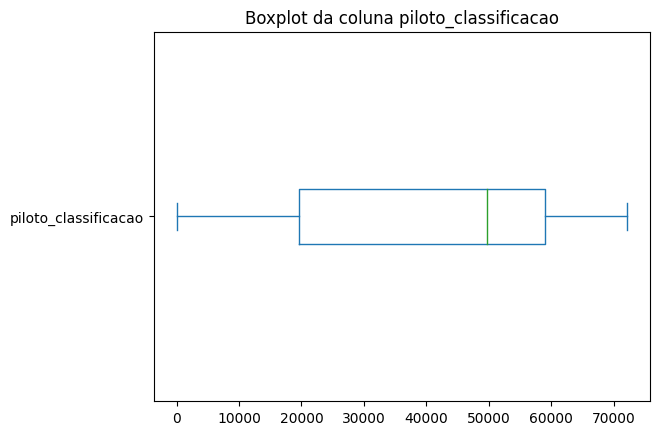

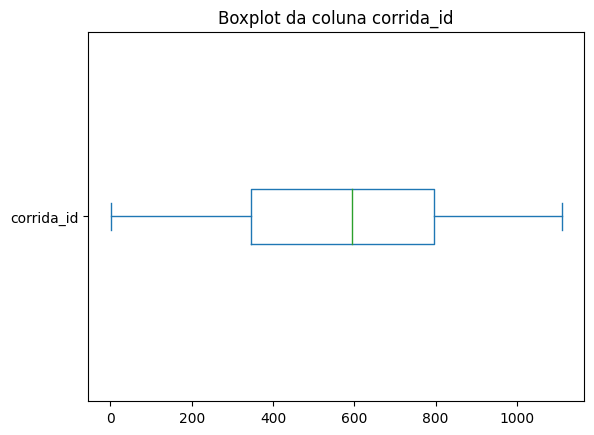

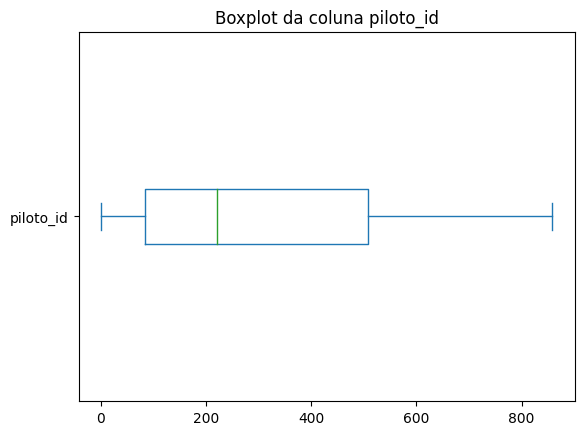

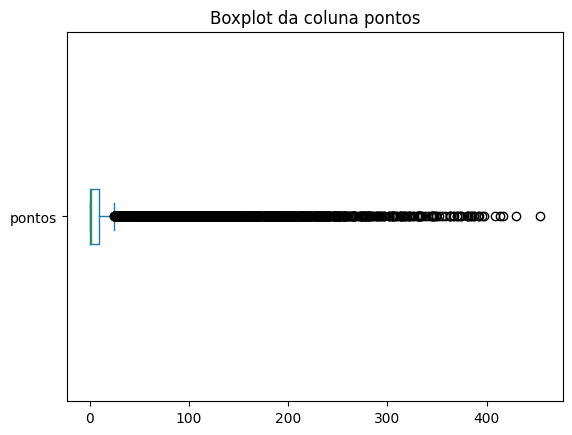

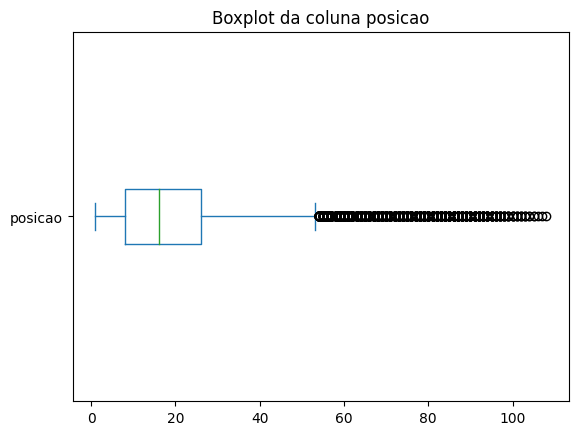

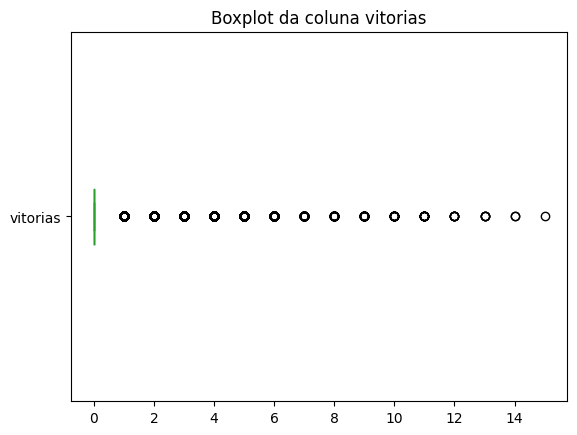

In [1332]:
# Crie um boxplot para cada coluna numérica
for coluna in piloto_classificacoes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    piloto_classificacoes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

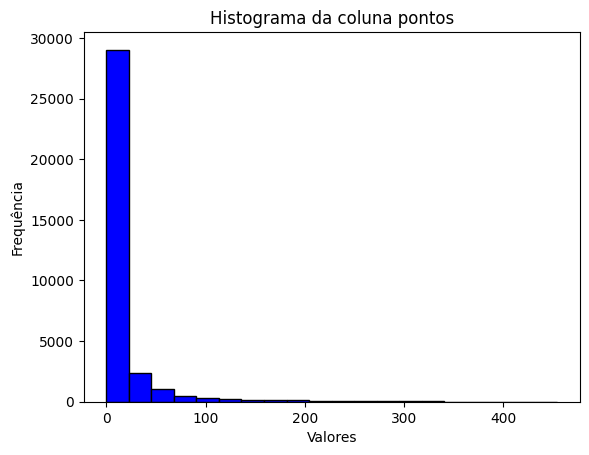

In [1333]:
# Criar o histograma
plt.hist(piloto_classificacoes['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna pontos')

# Mostrar o gráfico
plt.show()

In [1334]:
print(piloto_classificacoes['pontos'].max())
print(piloto_classificacoes['pontos'].min())

454.0
0.0


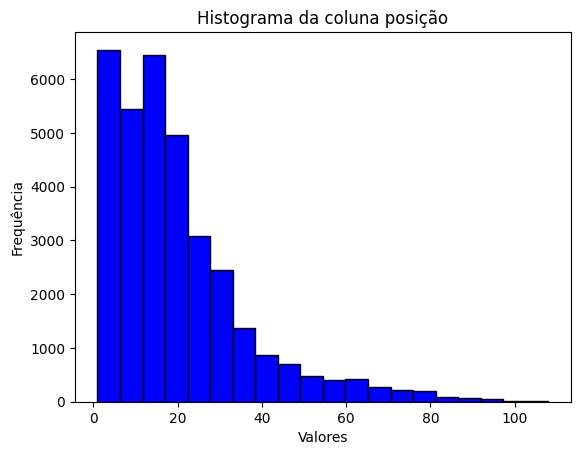

In [1335]:
# Criar o histograma
plt.hist(piloto_classificacoes['posicao'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna posição')

# Mostrar o gráfico
plt.show()

In [1336]:
print(piloto_classificacoes['posicao'].max())
print(piloto_classificacoes['posicao'].min())

108
1


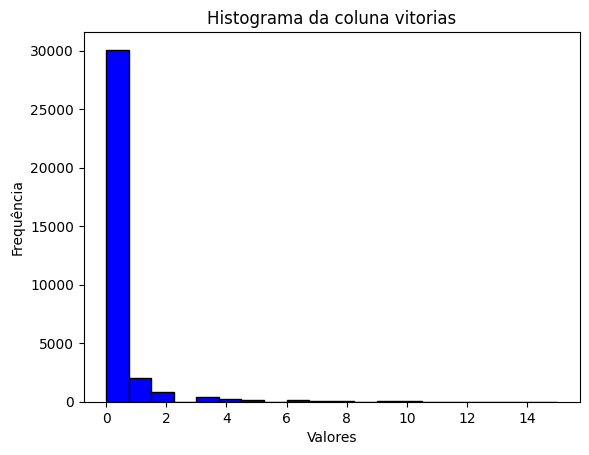

In [1337]:
# Criar o histograma
plt.hist(piloto_classificacoes['vitorias'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [1338]:
print(piloto_classificacoes['vitorias'].max())
print(piloto_classificacoes['vitorias'].min())

15
0


### T/L tabela CONSTRUCTORS (CONSTRUTORES):

Coméntarios:
Tabela clean, só precisou derrubar o url e arrumar o types das tabelas

#### Alterações pré-determinadas:

In [1339]:
construtores

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [1340]:
#Colocando as colunas em PT_BR
construtores.columns = ['construtor_id', 'construtor_ref', 'nome', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
construtores = construtores.drop('url', axis=1)

In [1341]:
construtores

,construtor_id,construtor_ref,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


#### Informações sobre as colunas

In [1342]:
print("Colunas: ")
construtores.columns

Colunas: 


Index(['construtor_id', 'construtor_ref', 'nome', 'nacionalidade'], dtype='object')

In [1343]:
print("Descricao: ")
construtores.describe()

Descricao: 


,construtor_id
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [1344]:
print("Informacoes: ")
construtores.info()
print("\n")


print("Dimensoes: ")
print(construtores.shape)
print("\n")

print("Head:")
construtores.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   construtor_id   211 non-null    int64 
 1   construtor_ref  211 non-null    object
 2   nome            211 non-null    object
 3   nacionalidade   211 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


Dimensoes: 
(211, 4)


Head:


,construtor_id,construtor_ref,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [1345]:
#retorna o número de valores ausentes para cada coluna.
construtores.isna().sum()

construtor_id     0
construtor_ref    0
nome              0
nacionalidade     0
dtype: int64

#### Alterações de type nas colunas e nulls

In [1346]:
#Colocando os valores "\n" COMO None
construtores = construtores.replace('\\N', np.nan)

In [1347]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtores.columns:
    contagem = construtores[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtor_id: 0
construtor_ref: 0
nome: 0
nacionalidade: 0


In [1348]:
#Transformando em String
construtores['construtor_ref'] = construtores['construtor_ref'].astype(pd.StringDtype())
construtores['nome'] = construtores['nome'].astype(pd.StringDtype())
construtores['nacionalidade'] = construtores['nacionalidade'].astype(pd.StringDtype())

In [1349]:
construtores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   construtor_id   211 non-null    int64 
 1   construtor_ref  211 non-null    string
 2   nome            211 non-null    string
 3   nacionalidade   211 non-null    string
dtypes: int64(1), string(3)
memory usage: 6.7 KB


### T/L tabela CONSTRUCTORS_RESULTS (CONSTRUCTORS_RESULTS):

coméntarios:
As colunas fazem sentido, porém a coluna status possuí quase 100% de 'nan' que seria nulos. A minha hipotesé é que o convencional é o /n que é nulo, e só em algumas situações terá um valor diferente, como o D que possívelmente é para 'disqualified'. Devido a isso eu resolvi manter mesmo que seja quase uma coluna totalmente descartavel.

#### Alterações pré-determinadas:

In [1350]:
construtores_resultados

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [1351]:
construtores_resultados.columns = ['construtores_resultados_id','race_id', 'construtores_id', 'pontos', 'status']

In [1352]:
construtores_resultados

,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


#### Informações sobre as colunas

In [1353]:
print("Colunas: ")
construtores_resultados.columns

Colunas: 


Index(['construtores_resultados_id', 'race_id', 'construtores_id', 'pontos',
       'status'],
      dtype='object')

In [1354]:
print("Descricao: ")
consrutores_resultados.describe()

Descricao: 


NameError: name 'consrutores_resultados' is not defined

In [ ]:
print("Informacoes: ")
construtores_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtores_resultados.shape)
print("\n")

print("Head:")
construtores_resultados.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        180 non-null    int64 
 1   raceId          180 non-null    int64 
 2   driverId        180 non-null    int64 
 3   constructorId   180 non-null    int64 
 4   number          180 non-null    int64 
 5   grid            180 non-null    int64 
 6   position        180 non-null    object
 7   positionText    180 non-null    object
 8   positionOrder   180 non-null    int64 
 9   points          180 non-null    int64 
 10  laps            180 non-null    int64 
 11  time            180 non-null    object
 12  milliseconds    180 non-null    object
 13  fastestLap      180 non-null    object
 14  fastestLapTime  180 non-null    object
 15  statusId        180 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 22.6+ KB


Dimensoes: 
(180, 16)


Head:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [ ]:
#retorna o número de valores ausentes para cada coluna.
construtores_resultados.isna().sum()

resultId          0
raceId            0
driverId          0
constructorId     0
number            0
grid              0
position          0
positionText      0
positionOrder     0
points            0
laps              0
time              0
milliseconds      0
fastestLap        0
fastestLapTime    0
statusId          0
dtype: int64

#### Alterações de type nas colunas e nulls

In [ ]:
construtores_resultados

,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [ ]:
#Colocando os valores "\n" COMO None
construtores_resultados = construtores_resultados.replace('\\N', np.nan)

In [ ]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtores_resultados.columns:
    contagem = construtores_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtores_resultados_id: 0
race_id: 0
construtores_id: 0
pontos: 0
status: 0


In [ ]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtores_resultados.columns:
    contagem = construtores_resultados[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
construtores_resultados_id: 0
race_id: 0
construtores_id: 0
pontos: 0
status: 12273


In [ ]:
construtores_resultados.shape

(12290, 5)

In [ ]:
#quantidade de nulls
valores_nulos = construtores_resultados['status'].isna()

# Calcule a porcentagem de valores nulos
porcentagem_nulos = (valores_nulos.sum() / len(construtores_resultados['status'])) * 100

print('Porcentagem de valores nulos na coluna:', porcentagem_nulos)

Porcentagem de valores nulos na coluna: 99.86167615947925


In [ ]:
#Transformando em String
construtores_resultados['status'] = construtores_resultados['status'].astype(pd.StringDtype())

#### Gráfico e Estátisticas

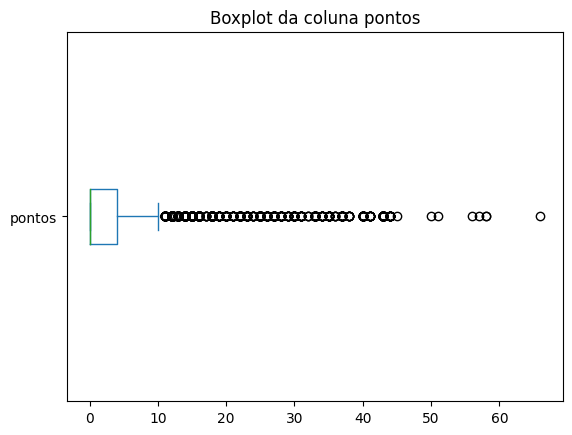

In [ ]:
plt.figure()  # Crie uma nova figura para cada boxplot
construtores_resultados['pontos'].plot(kind='box', vert=False)
plt.title(f'Boxplot da coluna pontos')

# Exiba os boxplots
plt.show()

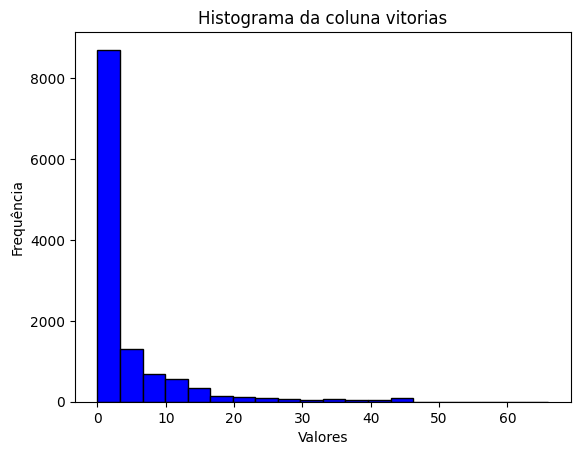

In [ ]:
# Criar o histograma
plt.hist(construtores_resultados['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [ ]:
print(construtores_resultados['pontos'].max())
print(construtores_resultados['pontos'].min())

66.0
0.0


### T/L tabela SPRINT_RESULTS (SPRINT_RESULTS):

Coméntarios:
Dificuldade para alterar para time, int
Tabela no geral limpa, possuí alguns nulls

#### Alterações pré-determinadas

In [ ]:
sprint_resultados

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


In [ ]:
#Colocando as colunas em PT_BR
sprint_resultados.columns = ['resultado_id', 'race_id', 'piloto_id', 'constructor_id', 'numero', 'gride', 'posicao', 'posicao_texto', 'posicao_ordem', 'pontos', 'voltas', 'tempo', 'milisegundos', 'volta_rapida', 'volta_rapida_tempo', 'status_id']

In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


#### Informações sobre as colunas

In [ ]:
print("Colunas: ")
sprint_resultados.columns

Colunas: 


Index(['construtores_resultados_id', 'race_id', 'construtores_id', 'pontos',
       'status'],
      dtype='object')

In [ ]:
print("Descricao: ")
sprint_resultados.describe()

Descricao: 


,construtores_resultados_id,race_id,construtores_id,pontos
count,12290.000000,12290.000000,12290.000000,12290.000000
mean,8191.007242,511.762815,44.661676,3.859967
std,5561.388146,302.677952,57.851043,7.555135
min,1.000000,1.000000,1.000000,0.000000
25%,3073.250000,281.000000,6.000000,0.000000
50%,6145.500000,477.000000,22.000000,0.000000
75%,13698.750000,722.000000,53.000000,4.000000
max,16789.000000,1110.000000,214.000000,66.000000


In [ ]:
print("Informacoes: ")
sprint_resultados.info()
print("\n")


print("Dimensoes: ")
print(sprint_resultados.shape)
print("\n")

print("Head:")
sprint_resultados.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   construtores_resultados_id  12290 non-null  int64  
 1   race_id                     12290 non-null  int64  
 2   construtores_id             12290 non-null  int64  
 3   pontos                      12290 non-null  float64
 4   status                      17 non-null     string 
dtypes: float64(1), int64(3), string(1)
memory usage: 480.2 KB


Dimensoes: 
(12290, 5)


Head:


,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,<NA>
1,2,18,2,8.0,<NA>
2,3,18,3,9.0,<NA>
3,4,18,4,5.0,<NA>
4,5,18,5,2.0,<NA>


In [ ]:
#retorna o número de valores ausentes para cada coluna.
sprint_resultados.isna().sum()

construtores_resultados_id        0
race_id                           0
construtores_id                   0
pontos                            0
status                        12273
dtype: int64

#### Alterações de type nas colunas e nulls (Não foi possível fazer algumas conversões de type)

In [ ]:
#Colocando os valores "\n" COMO None
sprint_resultados = sprint_resultados.replace('\\N' , np.nan)

In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,NaN,NaN,2,2:02.516,130


In [ ]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in sprint_resultados.columns:
    contagem = sprint_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
resultado_id: 0
race_id: 0
piloto_id: 0
constructor_id: 0
numero: 0
gride: 0
posicao: 0
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 0
milisegundos: 0
volta_rapida: 0
volta_rapida_tempo: 0
status_id: 0


In [ ]:
# Calcular a porcentagem de valores nulos para cada coluna
porcentagens_nulos = sprint_resultados.isna().mean() * 100

print('Porcentagem de valores nulos em cada coluna:')
print(porcentagens_nulos)

Porcentagem de valores nulos em cada coluna:
resultado_id          0.000000
race_id               0.000000
piloto_id             0.000000
constructor_id        0.000000
numero                0.000000
gride                 0.000000
posicao               5.000000
posicao_texto         0.000000
posicao_ordem         0.000000
pontos                0.000000
voltas                0.000000
tempo                 5.555556
milisegundos          5.555556
volta_rapida          3.333333
volta_rapida_tempo    3.333333
status_id             0.000000
dtype: float64


In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,NaN,NaN,2,2:02.516,130


In [ ]:
sprint_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   resultado_id        180 non-null    int64 
 1   race_id             180 non-null    int64 
 2   piloto_id           180 non-null    int64 
 3   constructor_id      180 non-null    int64 
 4   numero              180 non-null    int64 
 5   gride               180 non-null    int64 
 6   posicao             171 non-null    object
 7   posicao_texto       180 non-null    object
 8   posicao_ordem       180 non-null    int64 
 9   pontos              180 non-null    int64 
 10  voltas              180 non-null    int64 
 11  tempo               170 non-null    object
 12  milisegundos        170 non-null    object
 13  volta_rapida        174 non-null    object
 14  volta_rapida_tempo  174 non-null    object
 15  status_id           180 non-null    int64 
dtypes: int64(10), object(6)
me

In [ ]:
#Transformando em float (o int não está funcionando)
sprint_resultados['posicao'] = pd.to_numeric(sprint_resultados['posicao'], errors='coerce')
sprint_resultados['volta_rapida'] = pd.to_numeric(sprint_resultados['volta_rapida'], errors='coerce')

#Transformando em String
sprint_resultados['posicao_texto'] = sprint_resultados['posicao_texto'].astype(pd.StringDtype())

#Transformando em String porque está inviavel transformar em time em str porque está complicado transformar em time:
sprint_resultados['tempo'] = sprint_resultados['tempo'].astype(pd.StringDtype())
sprint_resultados['volta_rapida_tempo'] = sprint_resultados['posicao_texto'].astype(pd.StringDtype())
sprint_resultados['milisegundos'] = sprint_resultados['milisegundos'].astype(pd.StringDtype()) #Problema para converter para time


In [ ]:
sprint_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultado_id        180 non-null    int64  
 1   race_id             180 non-null    int64  
 2   piloto_id           180 non-null    int64  
 3   constructor_id      180 non-null    int64  
 4   numero              180 non-null    int64  
 5   gride               180 non-null    int64  
 6   posicao             171 non-null    float64
 7   posicao_texto       180 non-null    string 
 8   posicao_ordem       180 non-null    int64  
 9   pontos              180 non-null    int64  
 10  voltas              180 non-null    int64  
 11  tempo               170 non-null    string 
 12  milisegundos        170 non-null    string 
 13  volta_rapida        174 non-null    float64
 14  volta_rapida_tempo  180 non-null    string 
 15  status_id           180 non-null    int64  
dtypes: float

In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,2,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,3,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,4,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,16,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,17,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,18,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,R,130


#### Gráfico e Estátisticas

In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,2,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,3,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,4,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,16,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,17,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,18,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,R,130


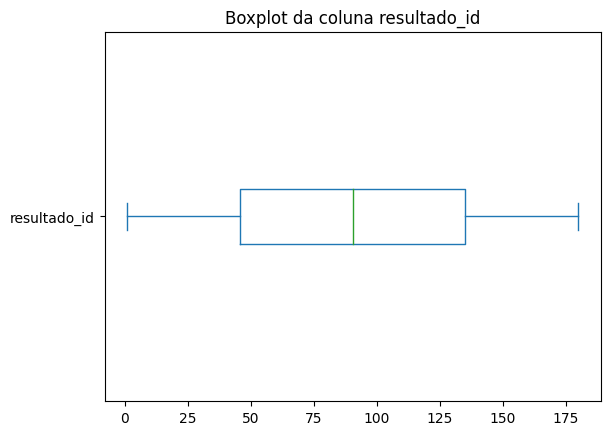

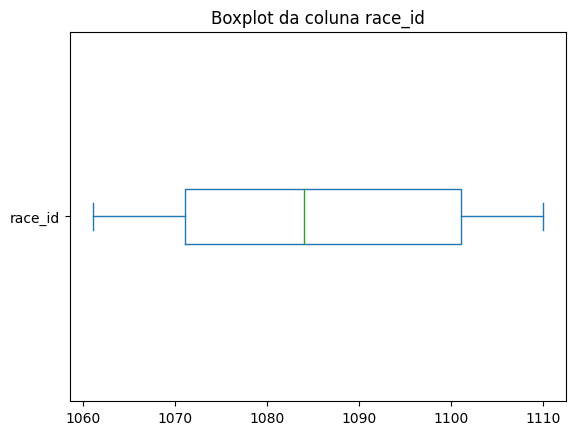

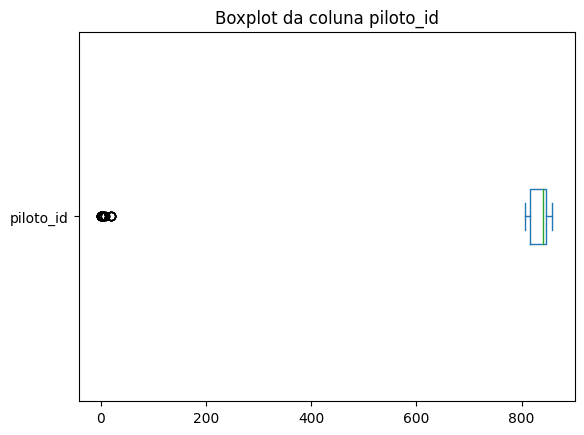

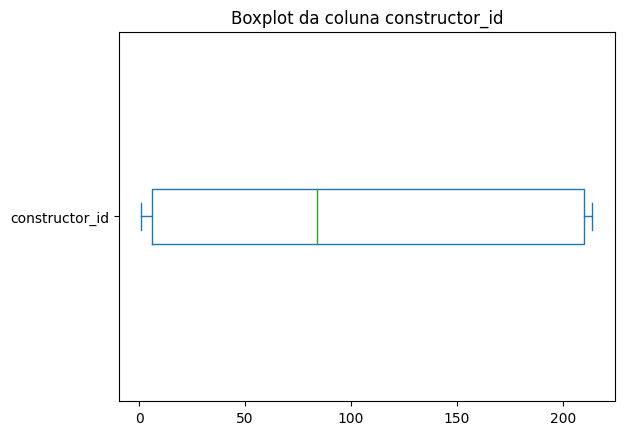

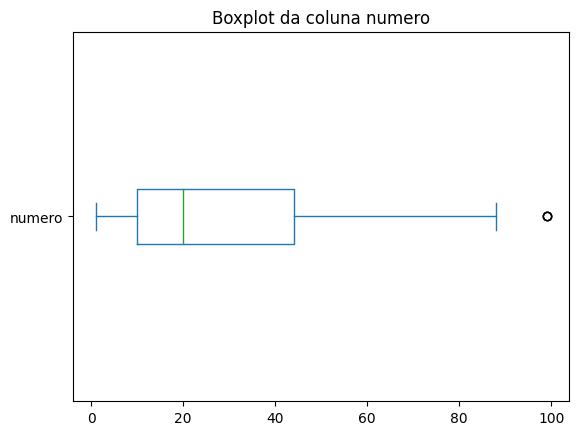

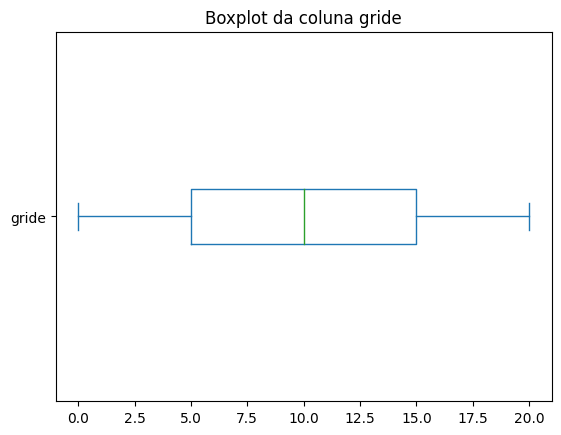

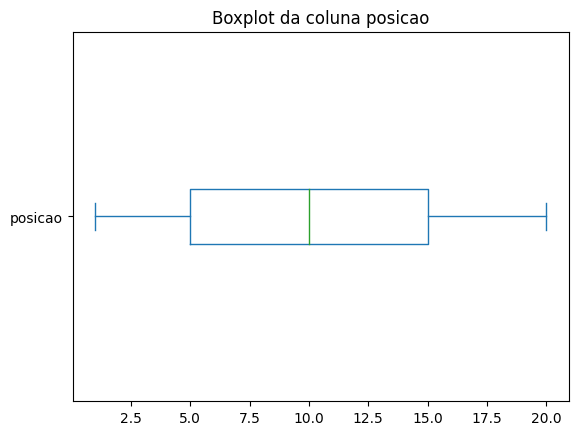

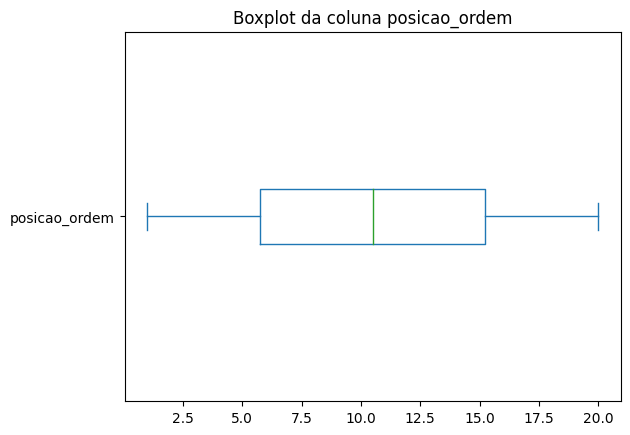

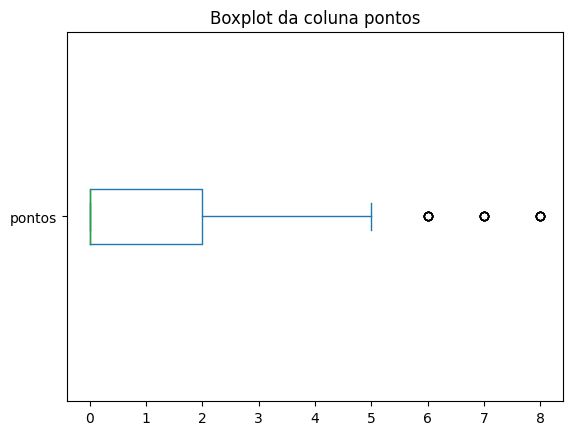

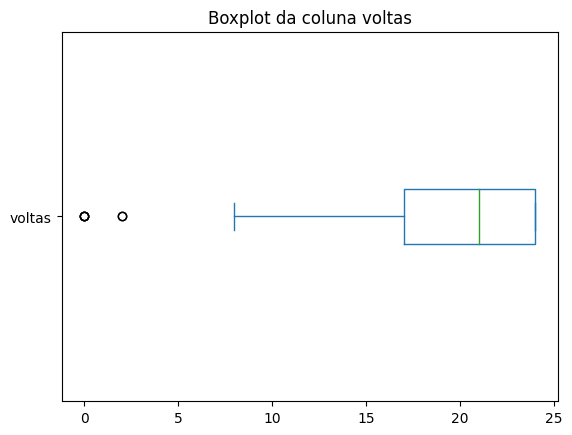

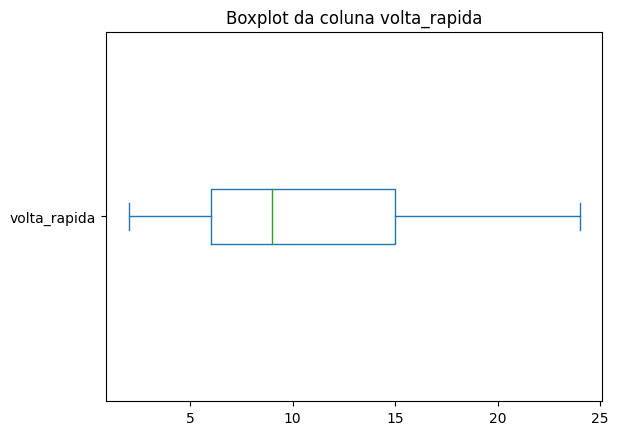

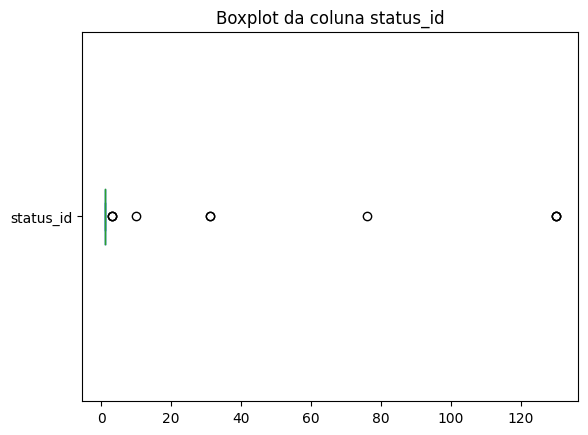

In [ ]:
# Crie um boxplot para cada coluna numérica
for coluna in sprint_resultados.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    sprint_resultados[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

In [ ]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,2,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,3,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,4,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,16,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,17,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,18,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,R,130


### T/L tabela parada_boxes (PIT_STOPS):

#### Alterações pré-determinadas

In [ ]:
parada_boxes

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


In [ ]:
parada_boxes.columns = ['corrida_id', 'piloto_id', 'parada', 'volta', 'tempo', 'duracao', 'milisegundos']

In [ ]:
parada_boxes

,corrida_id,piloto_id,parada,volta,tempo,duracao,milisegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


#### Informações sobre as colunas

In [1355]:
print("Colunas: ")
parada_boxes.columns

Colunas: 


Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')

In [1356]:
print("Descricao: ")
parada_boxes.describe()

Descricao: 


,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [1357]:
print("Informacoes: ")
parada_boxes.info()
print("\n")


print("Dimensoes: ")
print(parada_boxes.shape)
print("\n")

print("Head:")
parada_boxes.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


Dimensoes: 
(10089, 7)


Head:


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [1358]:
#retorna o número de valores ausentes para cada coluna.
parada_boxes.isna().sum()

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

#### Alterações de type nas colunas e nulls 

#### Gráfico e Estátisticas